In [156]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl

In [157]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")

## 1. Plot Sr vs descriptors

In [158]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df = df.dropna()
df = df.drop(columns=['stext','start_year','end_year','years','kg'])
df_st = StandardScaler().fit_transform(df) #standardize all values
df_st = pd.DataFrame(df_st)
df_st.index = df.index
df_st.columns = df.columns

In [ ]:
# plot sr vs descriptors
def plot_sr_vs_var(df,var1,var2,mode):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    ax.plot(df[var1],df[var2],'go',markersize=1)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_tc(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis_r', 21)
    bounds = np.linspace(0,0.5,5)
    bounds2 = np.linspace(0,0.5,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['tc'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='tree cover (-)', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['tc']<bounds[1]],df[var2][df['tc']<bounds[1]],c=df['tc'][df['tc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],df[var2][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],c=df['tc'][(df['tc']>=bounds[1])&(df['tc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],df[var2][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],c=df['tc'][(df['tc']>=bounds[2])&(df['tc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['tc']>=bounds[3])],df[var2][(df['tc']>=bounds[3])],c=df['tc'][(df['tc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_ntc(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis', 21)
    bounds = np.linspace(0.3,0.8,5)
    bounds2 = np.linspace(0.3,0.8,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['ntc'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='non tree cover (-)', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['ntc']<bounds[1]],df[var2][df['ntc']<bounds[1]],c=df['ntc'][df['ntc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],df[var2][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],c=df['ntc'][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],df[var2][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],c=df['ntc'][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['ntc']>=bounds[3])],df[var2][(df['ntc']>=bounds[3])],c=df['ntc'][(df['ntc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()
    
def plot_sr_vs_var_ai(df,var1,var2,mode):
    cmap = cm.get_cmap('viridis', 21)
    bounds = np.linspace(0,2,5)
    bounds2 = np.linspace(0,2,5)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(2,4,3)
    ax2 = plt.subplot(2,4,4)
    ax3 = plt.subplot(2,4,7)
    ax4 = plt.subplot(2,4,8)
    ax5 = plt.subplot(1,2,1)
    axes = [ax1, ax2, ax3, ax4,ax5]
    s = ax5.scatter(df[var1],df[var2],c=df['ai'],s=0.5,cmap=cmap,norm=norm)
    cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(label='aridity index', size=12)
    ax5.set_xlabel(var1,size=12)
    ax5.set_ylabel(var2,size=12)
    ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
    rs = np.corrcoef(df[var1],df[var2])[0,1]**2
    ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
    ax5.tick_params(labelsize=12)
    ax1.scatter(df[var1][df['ai']<bounds[1]],df[var2][df['ai']<bounds[1]],c=df['ai'][df['ai']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
    ax2.scatter(df[var1][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],df[var2][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],c=df['ai'][(df['ai']>=bounds[1])&(df['ai']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
    ax3.scatter(df[var1][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],df[var2][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],c=df['ai'][(df['ai']>=bounds[2])&(df['ai']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
    ax4.scatter(df[var1][(df['ai']>=bounds[3])],df[var2][(df['ai']>=bounds[3])],c=df['ai'][(df['ai']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)
    fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
    plt.close()

In [176]:
var = df.columns
for i in var:
    plot_sr_vs_var(df,i,'sr_20','keep_units')
    plot_sr_vs_var(df_st,i,'sr_20','standardized')
    plot_sr_vs_var_tc(df,i,'sr_20','tree_cover')
    plot_sr_vs_var_ntc(df,i,'sr_20','non_tree_cover')
    plot_sr_vs_var_ai(df,i,'sr_20','aridity_index')

In [ ]:
var1=var[0]
var2='sr_20'

cmap = cm.get_cmap('viridis', 21)
bounds = np.linspace(0.3,0.8,5)
bounds2 = np.linspace(0.3,0.8,5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
s = ax.scatter(df[var1],df[var2],c=df['ntc'],s=0.5,cmap=cmap,norm=norm)
cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='non tree cover (-)', size=12)
ax.set_xlabel(var1)
ax.set_ylabel(var2)
ax.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
rs = np.corrcoef(df[var1],df[var2])[0,1]**2
ax.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
fig.savefig(f'{work_dir}/output/figures/prediction_figures/sr_scatters/{mode}/{var1}_{var2}.jpg', bbox_inches='tight',dpi=300)
plt.close()

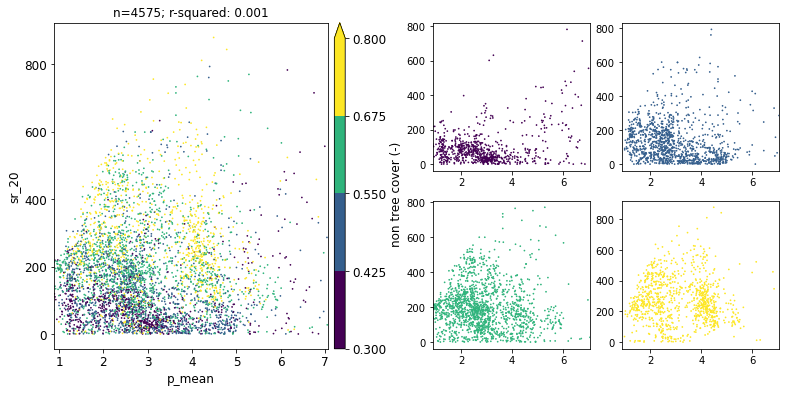

In [167]:
cmap = cm.get_cmap('viridis', 21)
bounds = np.linspace(0.3,0.8,5)
bounds2 = np.linspace(0.3,0.8,5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(13, 6))
ax1 = plt.subplot(2,4,3)
ax2 = plt.subplot(2,4,4)
ax3 = plt.subplot(2,4,7)
ax4 = plt.subplot(2,4,8)
ax5 = plt.subplot(1,2,1)
axes = [ax1, ax2, ax3, ax4,ax5]

s = ax5.scatter(df[var1],df[var2],c=df['ntc'],s=0.5,cmap=cmap,norm=norm)
cbar = plt.colorbar(s, orientation='vertical', label='',spacing='proportional',extend='max', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='non tree cover (-)', size=12)
ax5.set_xlabel(var1,size=12)
ax5.set_ylabel(var2,size=12)
ax1.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
ax2.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
ax3.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
ax4.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
ax5.set_xlim(df[var1].quantile(0.01),df[var1].quantile(0.99))
rs = np.corrcoef(df[var1],df[var2])[0,1]**2
ax5.set_title(f'n={len(df[var1])}; r-squared: {np.round(rs,3)}')
ax5.tick_params(labelsize=12)
ax1.scatter(df[var1][df['ntc']<bounds[1]],df[var2][df['ntc']<bounds[1]],c=df['ntc'][df['ntc']<bounds[1]],s=0.5,cmap=cmap,norm=norm)
ax2.scatter(df[var1][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],df[var2][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],c=df['ntc'][(df['ntc']>=bounds[1])&(df['ntc']<bounds[2])],s=0.5,cmap=cmap,norm=norm)
ax3.scatter(df[var1][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],df[var2][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],c=df['ntc'][(df['ntc']>=bounds[2])&(df['ntc']<bounds[3])],s=0.5,cmap=cmap,norm=norm)
ax4.scatter(df[var1][(df['ntc']>=bounds[3])],df[var2][(df['ntc']>=bounds[3])],c=df['ntc'][(df['ntc']>=bounds[3])],s=0.5,cmap=cmap,norm=norm)



In [162]:
bounds

array([0.3  , 0.425, 0.55 , 0.675, 0.8  ])

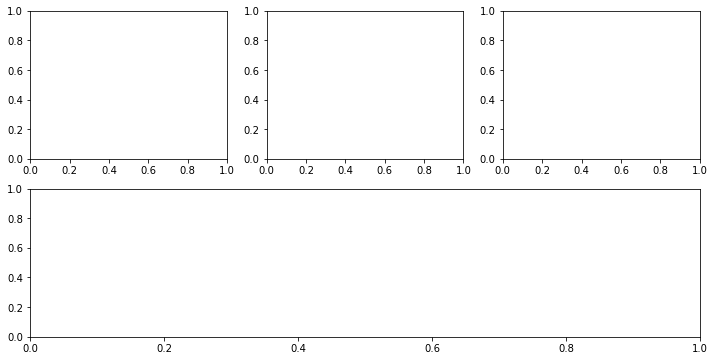

In [146]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

## 2. PCA

In [4]:
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
df

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,lat,lon,bp,dtb,pclay,psand,pcarb,bulk,stext,20
mx_0000044,5.007706,2.991437,3.236691,16.982108,1.674014,0.547472,7.525279,6.401016,3.35,14.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.546913
ca_0002351,1.590253,1.401269,0.455940,0.643260,1.134867,0.419085,32.852726,25.221876,5.05,22.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.414394
ru_0000236,1.755921,0.793217,1.272552,-0.896497,2.213671,0.365450,36.409631,29.179982,3.29,15.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
br_0001524,4.594565,2.985874,1.390253,19.671313,1.538767,0.691181,10.875286,7.688446,3.35,18.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.222472
in_0000027,3.368431,2.750685,1.488658,25.678652,1.224579,1.198574,17.669193,15.270651,17.75,72.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.277444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
br_0003035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.935716
br_0002187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.042606
es_0000858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.842804
nz_0000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.723108


In [5]:
df.columns

Index(['p_mean', 'ep_mean', 'q_mean', 't_mean', 'ai', 'hai', 'tdiff_max',
       'tdiff_mean', 'idu_mean', 'idu_max', 'hpd_mean', 'hpd_max', 'hpf',
       'lpf', 'si_p', 'si_ep', 'phi', 'de', 'dp', 'dt', 'sp', 'st', 'se', 'sd',
       'sti', 'ftf', 'asi', 'cvp', 'start_year', 'end_year', 'years',
       'idu_mean_l', 'idu_max_l', 'hpd_mean_l', 'hpd_max_l', 'hpf_l', 'lpf_l',
       'si_pl', 'phi_l', 'de_l', 'dp_l', 'dt_l', 'sp_l', 'st_l', 'se_l',
       'sd_l', 'sti_l', 'asi_l', 'tc', 'ntc', 'nonveg', 'area', 'el_mean',
       'el_min', 'el_max', 'el_std', 'slp_mean', 'slp_max', 'slp_min',
       'slp_std', 'iwu', 'ia', 'kg', 'lat', 'lon', 'bp', 'dtb', 'pclay',
       'psand', 'pcarb', 'bulk', 'stext', '20'],
      dtype='object')

In [15]:
# features = ['sr_20','p_mean','si_p','ep_mean','ai','t_mean','slp_mean','el_mean','tdiff_max','idu_mean','slp_mean','tdiff_max',
            # 'cla','hai','tpi','sp','st','se','sd','phi_l','hpd_mean_l','lpf'] # the order of these variables seems to matter, but why?
# features = ['sr_20','p_mean','si_p','ep_mean','ai','t_mean','slp_mean','el_mean'] 
features = ['p_mean', 'ep_mean','ai', 'hai','tdiff_mean','ftf', 'idu_mean_l', 'hpd_mean_l',
       'hpf_l', 'lpf_l', 'si_pl','si_ep', 'phi_l', 'de_l', 'dp_l', 'dt_l', 'sp_l',
       'st_l', 'se_l', 'sd_l','el_mean', 'drd', 'slp_mean','cla', 'snd', 'slt', 'tpi','sr_20']
lf = len(features)
print('length of features:', lf)
X = df[features]
X = X.dropna()
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=lf)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

length of features: 28


In [7]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([24.6, 18.9,  7.6,  6.8,  5.5,  4.8,  4.2,  3.4,  3.3,  3.2,  3.2,
        2.2,  2. ,  1.7,  1.5,  1.3,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,
        0.3,  0.3,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ])

In [21]:
# split features for visualization of PCA
features1=['sr_20','p_mean', 'ep_mean','ai', 'hai', 'tdiff_mean', 'idu_mean_l']
features2 = ['sr_20','hpf_l', 'lpf_l','si_pl','si_ep', 'phi_l']
features3=['sr_20','ftf','el_mean', 'slp_mean','tpi']
features4=['sr_20', 'de_l', 'dp_l', 'dt_l', 'sp_l','st_l', 'se_l', 'sd_l', 'hpd_mean_l']
features5=['sr_20', 'drd','cla', 'snd', 'slt']

In [34]:
ld_df = pd.DataFrame(index=features, columns=['xs','ys'])
ld_df['xs'] = loadings[0]
ld_df['ys'] = loadings[1]
ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
ld_df

,xs,ys,len
p_mean,0.225290,-0.243139,0.331470
ep_mean,0.310873,0.109575,0.329619
ai,-0.006638,-0.381963,0.382021
hai,0.068583,0.312606,0.320041
tdiff_mean,-0.342998,0.038763,0.345181
ftf,-0.272367,0.061951,0.279324
idu_mean_l,-0.010010,0.373339,0.373474
hpd_mean_l,0.107272,0.356395,0.372189
hpf_l,-0.234054,0.214324,0.317358
lpf_l,-0.238386,0.326789,0.404498


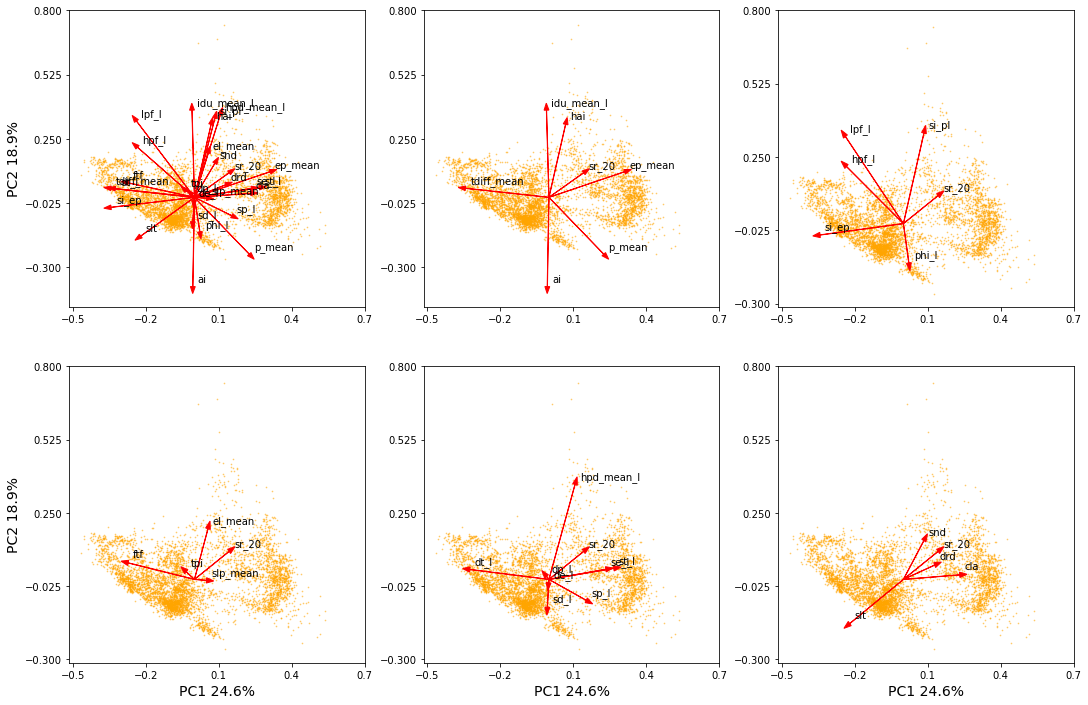

In [43]:
xs = loadings[0]
ys = loadings[1]

fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(231)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features[i]]['xs'], # length of the arrow along x
        ld_df.loc[features[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features[i]]['xs']+0.02, ld_df.loc[features[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)


ax = fig.add_subplot(232)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features1):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features1[i]]['xs'], # length of the arrow along x
        ld_df.loc[features1[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features1[i]]['xs']+0.02, ld_df.loc[features1[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
# ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(233)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features2):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features2[i]]['xs'], # length of the arrow along x
        ld_df.loc[features2[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features2[i]]['xs']+0.02, ld_df.loc[features2[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
# ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(234)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features3):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features3[i]]['xs'], # length of the arrow along x
        ld_df.loc[features3[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features3[i]]['xs']+0.02, ld_df.loc[features3[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)

ax = fig.add_subplot(235)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features4):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features4[i]]['xs'], # length of the arrow along x
        ld_df.loc[features4[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features4[i]]['xs']+0.02, ld_df.loc[features4[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
# ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(236)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features5):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features5[i]]['xs'], # length of the arrow along x
        ld_df.loc[features5[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features5[i]]['xs']+0.02, ld_df.loc[features5[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
# ax.set_ylabel(f'PC2 {per_var[1]}%')
fig.savefig(f'{work_dir}/output/figures/pca/pca_scatters.jpg',bbox_inches='tight',dpi=300)


In [53]:
ld_sort = ld_df.sort_values('len',ascending=False)
ld_sort = ld_sort[0:10]
ld_sort['rank'] = np.arange(1,11,1)
ld_sort = ld_sort.drop(columns=['xs','ys'])
ld_sort

,len,rank
lpf_l,0.404498,1
ai,0.382021,2
idu_mean_l,0.373474,3
hpd_mean_l,0.372189,4
si_pl,0.349997,5
si_ep,0.345447,6
tdiff_mean,0.345181,7
p_mean,0.331470,8
ep_mean,0.329619,9
dt_l,0.327161,10
